In [31]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

In [4]:
train_df = pd.read_csv(Path('Resources/2019loans.csv'))
test_df = pd.read_csv(Path('Resources/2020Q1loans.csv'))
train_df.head()

,Unnamed: 0,index,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,57107,57107,13375.0,0.1797,483.34,MORTGAGE,223000.0,Not Verified,low_risk,n,...,100.0,50.0,0.0,0.0,577150.0,122018.0,32000.0,170200.0,N,N
1,141451,141451,21000.0,0.1308,478.68,MORTGAGE,123000.0,Source Verified,low_risk,n,...,85.0,33.3,0.0,0.0,132750.0,27896.0,15900.0,35398.0,N,N
2,321143,321143,20000.0,0.1240,448.95,MORTGAGE,197000.0,Source Verified,low_risk,n,...,85.7,33.3,0.0,0.0,628160.0,114043.0,22600.0,90340.0,N,N
3,11778,11778,3000.0,0.1240,100.22,RENT,45000.0,Not Verified,low_risk,n,...,100.0,16.7,1.0,0.0,42006.0,20761.0,19900.0,15406.0,N,N
4,169382,169382,30000.0,0.1612,1056.49,MORTGAGE,133000.0,Source Verified,low_risk,n,...,100.0,66.7,0.0,0.0,283248.0,109056.0,79500.0,58778.0,N,N


In [5]:
test_df.head()

,Unnamed: 0,index,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,67991,67991,40000.0,0.0819,814.70,MORTGAGE,140000.0,Not Verified,low_risk,n,...,97.7,0.0,0.0,0.0,527975.0,70914.0,74600.0,99475.0,N,N
1,25429,25429,6000.0,0.1524,208.70,RENT,55000.0,Not Verified,low_risk,n,...,66.7,0.0,0.0,0.0,34628.0,23460.0,5900.0,23628.0,N,N
2,38496,38496,3600.0,0.1695,128.27,RENT,42000.0,Not Verified,low_risk,n,...,100.0,0.0,0.0,0.0,23100.0,19183.0,7300.0,15000.0,N,N
3,19667,19667,20000.0,0.1524,478.33,RENT,100000.0,Not Verified,low_risk,n,...,100.0,50.0,0.0,0.0,56481.0,43817.0,13800.0,35981.0,N,N
4,37505,37505,3600.0,0.1240,120.27,RENT,50000.0,Not Verified,low_risk,n,...,100.0,25.0,0.0,0.0,45977.0,32448.0,21000.0,24977.0,N,N


In [11]:
# Convert categorical data to numeric and separate target feature for training data
X_train = train_df.drop('loan_status', axis=1)
X_train_dummies = pd.get_dummies(X_train)

y_train_label = LabelEncoder().fit_transform(train_df['loan_status'])

print(y_train_label)
print(X_train_dummies.columns)
X_train_dummies

[1 1 1 ... 0 0 0]
Index(['Unnamed: 0', 'index', 'loan_amnt', 'int_rate', 'installment',
       'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mth

,Unnamed: 0,index,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N,debt_settlement_flag_Y
0,57107,57107,13375.0,0.1797,483.34,223000.0,29.99,0.0,0.0,15.0,...,0,1,0,1,1,0,1,0,1,0
1,141451,141451,21000.0,0.1308,478.68,123000.0,11.26,2.0,0.0,16.0,...,0,1,0,1,1,0,1,0,1,0
2,321143,321143,20000.0,0.1240,448.95,197000.0,11.28,0.0,0.0,12.0,...,0,1,0,1,1,0,1,0,1,0
3,11778,11778,3000.0,0.1240,100.22,45000.0,18.08,0.0,0.0,12.0,...,0,1,0,1,1,0,1,0,1,0
4,169382,169382,30000.0,0.1612,1056.49,133000.0,27.77,0.0,2.0,13.0,...,0,1,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12175,354912,354912,19975.0,0.2565,801.09,28000.0,28.42,0.0,0.0,15.0,...,0,1,0,1,1,0,1,0,1,0
12176,354944,354944,15000.0,0.1774,540.34,50000.0,23.43,4.0,0.0,16.0,...,1,1,0,1,1,0,1,0,1,0
12177,354973,354973,3600.0,0.1862,131.28,60000.0,28.80,0.0,1.0,14.0,...,0,1,0,1,1,0,1,0,1,0
12178,355002,355002,15000.0,0.0881,475.68,62000.0,11.44,0.0,0.0,5.0,...,0,1,0,1,0,1,1,0,1,0


In [14]:
# Convert categorical data to numeric and separate target feature for testing data
X_test = test_df.drop('loan_status', axis=1)
X_test_dummies = pd.get_dummies(X_test)

y_test_label = LabelEncoder().fit_transform(test_df['loan_status'])

print(y_test_label)
print(X_test_dummies.columns)
X_test_dummies

[1 1 1 ... 0 0 0]
Index(['Unnamed: 0', 'index', 'loan_amnt', 'int_rate', 'installment',
       'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mth

,Unnamed: 0,index,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,verification_status_Source Verified,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N
0,67991,67991,40000.0,0.0819,814.70,140000.0,19.75,0.0,1.0,18.0,...,0,0,1,0,1,1,0,1,0,1
1,25429,25429,6000.0,0.1524,208.70,55000.0,11.52,2.0,0.0,8.0,...,0,0,1,0,1,1,0,1,0,1
2,38496,38496,3600.0,0.1695,128.27,42000.0,6.74,0.0,0.0,6.0,...,0,0,1,0,1,1,0,1,0,1
3,19667,19667,20000.0,0.1524,478.33,100000.0,12.13,0.0,2.0,7.0,...,0,0,1,0,1,1,0,1,0,1
4,37505,37505,3600.0,0.1240,120.27,50000.0,16.08,0.0,3.0,6.0,...,0,0,1,0,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4697,77282,77282,30000.0,0.1240,673.42,140480.0,15.74,0.0,0.0,20.0,...,1,0,1,1,0,1,0,1,0,1
4698,77291,77291,24000.0,0.0756,747.22,50000.0,26.81,0.0,0.0,9.0,...,0,0,1,0,1,1,0,1,0,1
4699,77292,77292,10000.0,0.2305,387.36,33000.0,38.51,0.0,2.0,7.0,...,0,1,1,1,0,1,0,1,0,1
4700,77297,77297,8000.0,0.1862,205.86,38000.0,16.36,0.0,1.0,8.0,...,1,0,1,0,1,1,0,1,0,1


In [19]:
# add missing dummy variables to testing set
for col in X_train_dummies.columns:
    if col not in X_test_dummies.columns:
        print(col)

def labeler(binary):
    if binary == 0:
        return 1
    else:
        return 0

X_test_dummies['debt_settlement_flag_Y'] = X_test_dummies['debt_settlement_flag_N'].apply(lambda x: labeler(x))

X_test_dummies


debt_settlement_flag_Y


,Unnamed: 0,index,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N,debt_settlement_flag_Y
0,67991,67991,40000.0,0.0819,814.70,140000.0,19.75,0.0,1.0,18.0,...,0,1,0,1,1,0,1,0,1,0
1,25429,25429,6000.0,0.1524,208.70,55000.0,11.52,2.0,0.0,8.0,...,0,1,0,1,1,0,1,0,1,0
2,38496,38496,3600.0,0.1695,128.27,42000.0,6.74,0.0,0.0,6.0,...,0,1,0,1,1,0,1,0,1,0
3,19667,19667,20000.0,0.1524,478.33,100000.0,12.13,0.0,2.0,7.0,...,0,1,0,1,1,0,1,0,1,0
4,37505,37505,3600.0,0.1240,120.27,50000.0,16.08,0.0,3.0,6.0,...,0,1,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4697,77282,77282,30000.0,0.1240,673.42,140480.0,15.74,0.0,0.0,20.0,...,0,1,1,0,1,0,1,0,1,0
4698,77291,77291,24000.0,0.0756,747.22,50000.0,26.81,0.0,0.0,9.0,...,0,1,0,1,1,0,1,0,1,0
4699,77292,77292,10000.0,0.2305,387.36,33000.0,38.51,0.0,2.0,7.0,...,1,1,1,0,1,0,1,0,1,0
4700,77297,77297,8000.0,0.1862,205.86,38000.0,16.36,0.0,1.0,8.0,...,0,1,0,1,1,0,1,0,1,0


# Logistic vs. Random Forest Model Unscaled data

## Predictions

I predict the logistic regression model will perform worse on the unscaled dataset compared to the random forest model. Logistic regression models classify the lable based on an arithmatic equation 'weighted' by the feature's numerical value. Therefore, since the dataset is unscaled and highly skewed, the LR is likely to underperform. The random forest classifier is not affected by the scaling of the dataset, so I predict greater accuracy.

In [25]:
# Train the Logistic Regression model on the unscaled data and print the model score
classifier = LogisticRegression(max_iter=1000)

classifier.fit(X_train_dummies, y_train_label)

print(f"Training test score: {classifier.score(X_train_dummies, y_train_label)}")
print(f"Testing test score: {classifier.score(X_test_dummies, y_test_label)}")

Training test score: 0.7011494252873564
Testing test score: 0.5808166737558486


/Users/jaketrevithick/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [29]:
# Train a Random Forest Classifier model and print the model score
classifier_rf = RandomForestClassifier(n_estimators=200)

classifier_rf.fit(X_train_dummies, y_train_label)

print(f"Training test score: {classifier_rf.score(X_train_dummies, y_train_label)}")
print(f"Testing test score: {classifier_rf.score(X_test_dummies, y_test_label)}")

Training test score: 1.0
Testing test score: 0.6299447043811144


In [35]:
# Scale the data
scaler = StandardScaler().fit(X_train_dummies)
X_train_scaled = scaler.transform(X_train_dummies)
X_test_scaled = scaler.transform(X_test_dummies)


array([[-1.31172014, -1.31172014, -0.39311205, ..., -0.17149859,
         0.02026518, -0.02026518],
       [-0.46579523, -0.46579523,  0.35168119, ..., -0.17149859,
         0.02026518, -0.02026518],
       [ 1.3364188 ,  1.3364188 ,  0.25400339, ..., -0.17149859,
         0.02026518, -0.02026518],
       ...,
       [ 1.67571549,  1.67571549, -1.34791257, ..., -0.17149859,
         0.02026518, -0.02026518],
       [ 1.67600634,  1.67600634, -0.23438563, ..., -0.17149859,
         0.02026518, -0.02026518],
       [ 1.67906533,  1.67906533, -0.23438563, ..., -0.17149859,
         0.02026518, -0.02026518]])

In [36]:
# Train the Logistic Regression model on the scaled data and print the model score
classifier_LR = LogisticRegression(max_iter=1000)

classifier_LR.fit(X_train_scaled, y_train_label)

print(f"Training test score: {classifier_LR.score(X_train_scaled, y_train_label)}")
print(f"Testing test score: {classifier_LR.score(X_test_scaled, y_test_label)}")

Training test score: 0.7128899835796387
Testing test score: 0.7201190982560612


In [37]:
# Train a Random Forest Classifier model on the scaled data and print the model score
classifier_rf = RandomForestClassifier(n_estimators=200)

classifier_rf.fit(X_train_scaled, y_train_label)

print(f"Training test score: {classifier_rf.score(X_train_scaled, y_train_label)}")
print(f"Testing test score: {classifier_rf.score(X_test_scaled, y_test_label)}")

Training test score: 1.0
Testing test score: 0.623139089749043


[3.79337435e-02 4.24888407e-02 1.65494451e-02 3.08455129e-02
 3.35409555e-02 1.32897408e-02 1.39868556e-02 2.43123864e-03
 3.75154936e-03 7.78548771e-03 1.32364172e-03 1.37823600e-02
 1.05191484e-02 2.93274611e-02 3.01603960e-02 4.00624797e-02
 3.98815419e-02 5.64868682e-02 3.82949425e-02 1.59208926e-02
 0.00000000e+00 0.00000000e+00 8.75308629e-02 6.76238231e-04
 0.00000000e+00 5.15053480e-06 3.98064047e-03 1.21442183e-02
 4.23096461e-03 5.79833360e-03 3.67548920e-03 5.46136006e-03
 1.05721440e-02 1.20467770e-02 1.25311331e-02 4.81122546e-03
 6.60741074e-03 1.47129301e-02 1.14523585e-02 1.38212087e-02
 5.65422571e-03 5.89442346e-03 7.14906602e-03 8.44227625e-03
 1.28538366e-02 1.40180231e-02 1.27062857e-02 2.64974332e-04
 2.89232206e-06 1.45540674e-02 1.49733473e-02 1.05362424e-02
 9.13678477e-03 5.29960938e-03 1.22416443e-02 1.06035410e-02
 3.34048053e-03 6.28045549e-03 7.26161485e-03 6.57088468e-03
 8.00087463e-03 9.52382045e-03 7.92587563e-03 9.24425766e-03
 6.80505099e-03 7.995711

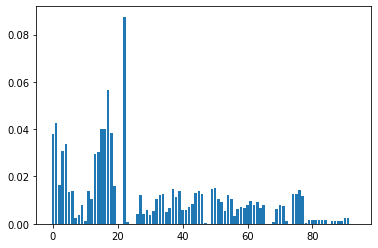

In [38]:
# Determining what features are important in the random forest model
features = classifier_rf.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

In [39]:
sel = SelectFromModel(classifier_LR)
sel.fit(X_train_scaled, y_train_label)
sel.get_support()

array([ True,  True,  True, False,  True, False, False, False, False,
        True, False, False,  True,  True, False,  True, False,  True,
        True,  True, False, False,  True, False, False, False, False,
        True, False,  True, False, False, False,  True, False,  True,
        True, False, False,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False,  True,  True,
        True,  True,  True, False, False, False,  True, False, False,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [40]:
# feature selection
X_selected_train = sel.transform(X_train_dummies)
X_selected_test = sel.transform(X_test_dummies)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

In [42]:
classifier_LR_selected = LogisticRegression(max_iter=1000).fit(X_selected_train_scaled, y_train_label)

print(f'Training Score: {classifier_LR_selected.score(X_selected_train_scaled, y_train_label)}')
print(f'Testing Score: {classifier_LR_selected.score(X_selected_test_scaled, y_test_label)}')

Training Score: 0.7063218390804598
Testing Score: 0.7033177371331348


In [43]:
sel = SelectFromModel(classifier_rf)
sel.fit(X_train_scaled, y_train_label)
sel.get_support()

# feature selection
X_selected_train = sel.transform(X_train_dummies)
X_selected_test = sel.transform(X_test_dummies)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)


classifier_rf = RandomForestClassifier(n_estimators=200)
classifier_rf.fit(X_selected_train_scaled, y_train_label)

print(f'Training Score: {classifier_rf.score(X_selected_train_scaled, y_train_label)}')
print(f'Testing Score: {classifier_rf.score(X_selected_test_scaled, y_test_label)}')

Training Score: 1.0
Testing Score: 0.596767333049766
